In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage
from skimage.filters.rank import median
from skimage.morphology import disk
from scipy import ndimage, misc

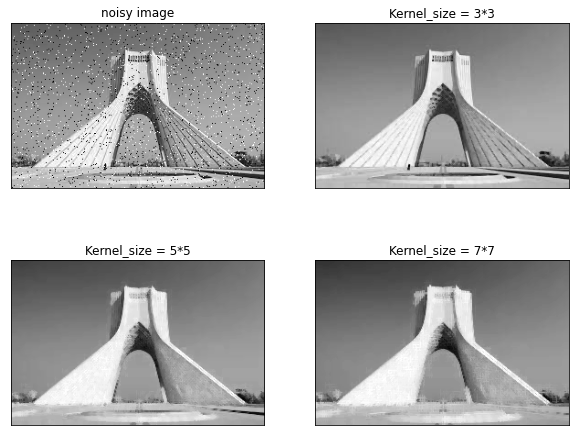

In [3]:
def get_cross_shape_filter(size):
  footprint = np.zeros((size,size))
  for i in range(0, size):
    for j in range(0, size):
        footprint[i,j] = 1 if (i==size//2 or j==size//2) else 0
  return footprint

img = cv2.imread("azadi_tower.jpg", cv2.IMREAD_GRAYSCALE)
# Apply salt & pepper noise
noisy_img = skimage.util.random_noise(img, mode='s&p')

# set kernel cross-shape
footprint1 = get_cross_shape_filter(size=3)
footprint2 = get_cross_shape_filter(size=5)
footprint3 = get_cross_shape_filter(size=7)

# median rank of 3*3 cross-shape kernel is equal to 2 because we have 5 non-zero value with 0 to 4 indexes
imgd1 = ndimage.rank_filter(img, rank=2, footprint=footprint1)
imgd2 = ndimage.rank_filter(img, rank=7, footprint=footprint2)
imgd3 = ndimage.rank_filter(img, rank=11, footprint=footprint3)

fig, axes= plt.subplots(2, 2, figsize=(10, 8))

axes[0,0].imshow(noisy_img, 'gray')
axes[0,0].set_title('noisy image')

axes[0,1].imshow(imgd1, 'gray')
axes[0,1].set_title('Kernel_size = 3*3')

axes[1,0].imshow(imgd2, 'gray')
axes[1,0].set_title('Kernel_size = 5*5')

axes[1,1].imshow(imgd3, 'gray')
axes[1,1].set_title('Kernel_size = 7*7')

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])


plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()
